# **Experimento de Regresión**
- Similar al experimento de clasificasión, con 2 fases, una de entendimiento o ajuste y otra de validacón. El cambio importante está en la comparación ajuste por diferencia o distancia, ya no seré capaz de percibir números como tal, sino alejamientos para ver si el modelo está correctamente ajustado. 
- Todos los modelos de clasificacion tienen su homologo en regresión 
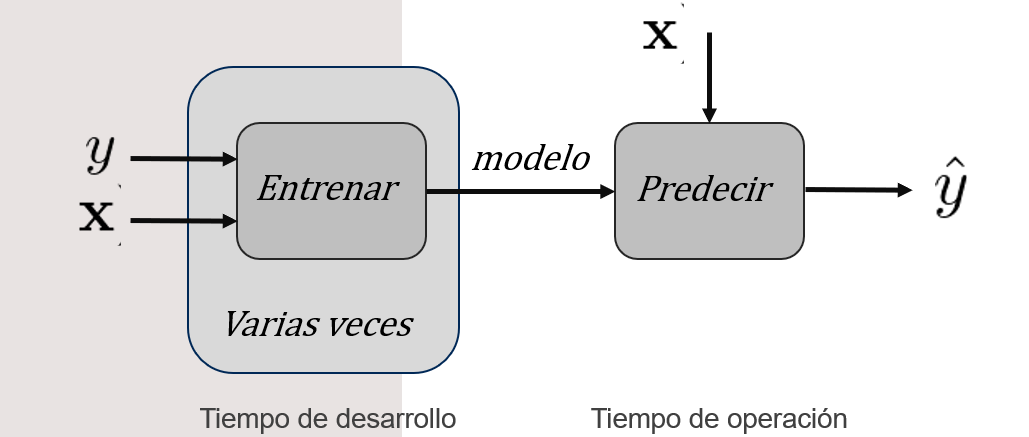
- más dificiles de ajustar precesamiente por las métricas de desempeño. 
- Aprendizage supervisado con y númerica (valor esperado del proceso).
- la y no la podemos encontrar de 2 formas :
    - Tabular: Una tabla que me indicará cada una de las variables, el problema de regresion es encontrar ese modelo que haga que esa y se vea en el comportamiento de las x. y~Xi 
    - Seriada: Un arreglo como vector, donde se tiene el valor de la y definida con datos como serie de tiempo. El problema cambia, ml siempre deben contar con variables x que definan a la y. Aqui no tenemos esas variables, es por eso que tendremos que crear las x.
    Va a depender de cómo tenga los datos 
- Empezamos a ajustar con los modelos más sencillos como (cómo cambian los modelos que ya conocemos)
    - Regresión líneal 
    - k vecinos más cercanos 
    - maquinas de soporte vectorial 
    - árboles de desición 
    - Modelos de ensamblaje 
    - MRA
- Qué empieza a cambiar en los modelos de entrenamiento:
    - tratamiento de nulos - Se mantiene 
    - Exploración de variables o caracteisticas - Se mantiene 
    - Separación en entrenamiento - valivación - Se mantiene 
    - Balanceo de y - NO se mantiene - nuestra variable no tiene escenarios, tiene valores, el balanceo aquí no es interesante.
    - Desempeño del modelo - Se mantiene - Pero va a cambiar mucho - Con diferentes medidas de desempeño 
- El modelo va a operar, y después se le va a pedir que haga un ciclo de retroalimentacion Machine Learning Operations
Escenario conjunto de proceso de data science. 
- También genera el pipeline del modelo, en clasificación llegamos hasta que el modelo está ajustado, ahora vamos a ver escenarios que nos permitan llevar ese modelo validado a funcionamiento con las primeras étapas de mlops. 


## **Medición del desempeño en regresión** 
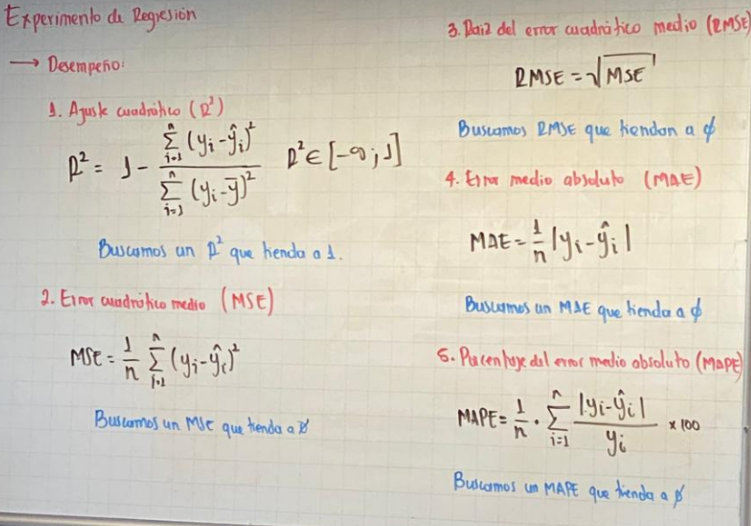
Sirven tanto para los problemas tabulares como para los de series. 

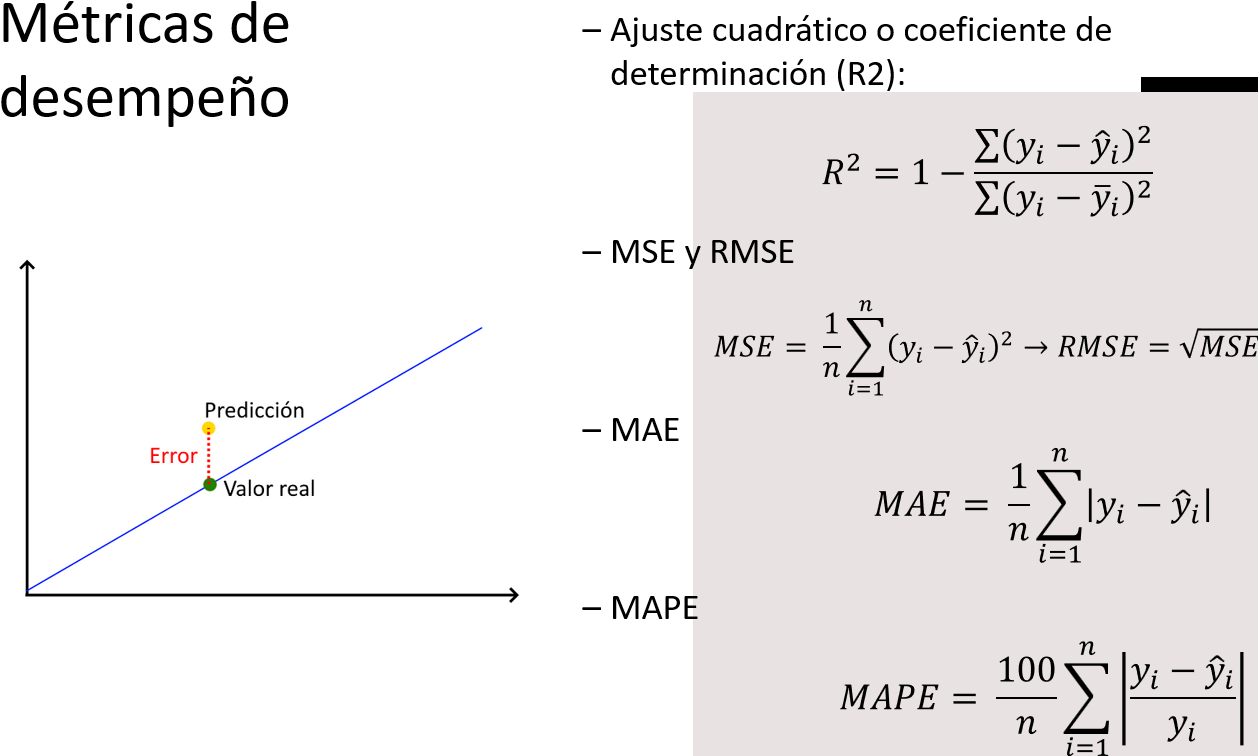
1. Ajuste Cuadrático (R^2):
    - R^2 = 1- (sum(yi-ýi)^2/sum(yi-ý)),  R^e[-inf,1] también puede dar negativo (no quiere decir que el modelo sea un mal modelo - solo que las variables x con las cuales fueron definidos los escenarios del suceso no están bien definidas- modelo que puede tender a fallar fácilmente)
    - Buscamos un R^2 que tienda a 1
    - qué tanto las predicciones se alejan del valor real y también del valor esperado de la y .
    - ý =E(y) es el valor esperado (valor que busco esperando a que mis sucesos ocurran casi siempre calculado como la media de y)
2. El error cuadático medio (MSE)
    - MSE=1/n.sum(yi-ý)^2 , buscamos que tienda a 0
    - Lo que hace es dividir por la cantidad de muestras y multiplica por las diferencias cuadáticas (sumar y promedia)
    - Dá resultados en cuadrados, osea que es un rango sobre el cual la variable sucede, es un poco complejo de entender, pues es un rango esférico.   
3. Raiz del error cuadrático medio (RMSE)
    - RMSE= sqrt(MSE), buscamos que tiendan a 0
4. Error medio absoluto (MAE) - para métricas de velocidad 
    - MAE=1/n. abs(yi-ýi), buscamos que tienda a 0. 
5. Porcentaje del error medio absoluto (MAPE)
    - MAPE= 1/n.sum(abs()), qué tanto se está separando el valor de sus predicciones al valor real, muchas veces lo multiplican por 100.
    - Buscamos que tienda a 0, ya que es error 
    - Si se quiere mirar probabilidad 1- MAPE, osea predecir correctamente 


## **1. Entendimiento del problema**
Garments Industry es una compañía del sector textil con muchas actividades manuales. Su éxito está en que las prendas son "hechas a mnao", por lo que medir la productividad de sus empleados se vuelve esencial para mejorar las utilidades de la organización. Es por esto que la compañía quiere estimar los niveles de productividad de sus empleados para mejorar la operación y mantener los ingresos esperados, además, identificar herramientas para mejorar el día a día de sus empleados.


## **2. Enfoque Analítico**
Construir un modelo de regresión para predecir la productividad de cada empleado con un MAPE menor al 20% (probabilidad superior al 80%)

## **3. Requerimiento de Datos**
- Se requieren datos del trabajador en su puesto de trabajo partícular
- Se requieren mediciones del puesto de tabajo (tiempos, cantidad de prendas, momentos de ocio, cantidad de personas)
- Se requiere una medición inicial de la productividad


## **4. Recolección de datos**

- date: Fecha de medición de la productividad.
- quarter: Trimestre de la medición.
- department: Área de trabajo en particular.
- day: Nombre del día en el que se hizo la medición.
- team: Número del equipo de trabajo.
- target _productivity: Productividad objetivo del área de trabajo.
- smv: Valor de tiempo estándar en minutos de la actividad.
- wip: Cantidad de trabajo en proceso (unidades).
- over_time: Tiempo en general de operación 
- incentive: procentaje de incentivos al área de trabajo 
- idle_time: tiempo de parada , ejem. cuato tiempo estuvo tiempo específicamente en ese día 
- idle_mean: Cantidad de trabajadores quietos en el tiempo de parada 
- no_of_style_change: Cantidad total de cambios de estilos en la producción
- no_of_workers: cantidad total de trabajadores
- actual_productivity: Productividad actual - Será nuestra y 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [2]:
data.info()
#tenemos más de 1000 datos, con 15 columnas identíficadas con obj, flotantes, e int. Hay datos nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## **5. Entendimiento de los datos**
- Conocer nuestra variable y (escencial ya que es lo que le va a decir al modelo los datos que quiero que se aprenda )
- identíficar datos nulos 
- Análisis univariado y multivariado 

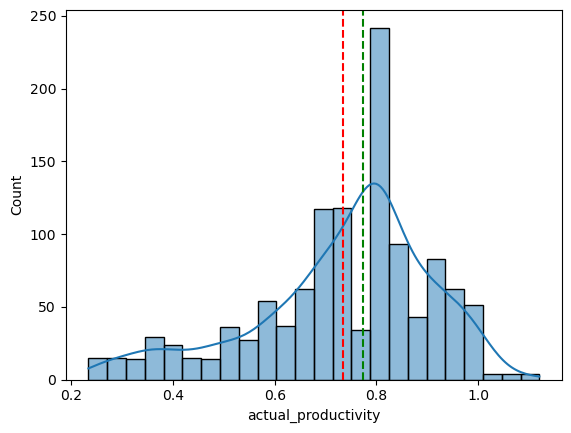

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.histplot(data=data, x='actual_productivity', kde=True)
plt.axvline(x=data.actual_productivity.mean(), color='red', linestyle= 'dashed')
plt.axvline(x=data.actual_productivity.median(), color='green', linestyle='dashed')
plt.show()
#áreas donla la productividad es menor al 20 % y mayor al 20%
# la mediana y la media son cercanas, ahí hay una mayor frec del 80%
#Es normal - mejor- alrededor de la media está la maypría de los individuos en nuestro problema - es muy dificil que siempre sea normal 

### La ley de los grandes números
- **Ley débil (convergencia en probabilidad)**
    - Cuanto más datos se recopilen más precesa será la medida, pues la variación aleatoria empieza a anularse y los valores atipico tienen menos impacto y la media se vuelve más estable. 
    - A medida que aumenta el tamaño de tu muestra, la media de esa muestra (llamadamedia muestral ) se acerca más a la media real de todo el grupo (llamada media poblacional).
- **Ley fuerte (convergencia casi segura)**
    - Dice que la media muestral se acercará a la media poblacional y se mantendrá en ella casi con toda seguridad, no sólo probablemente.
- Esto se ve más o menos así 
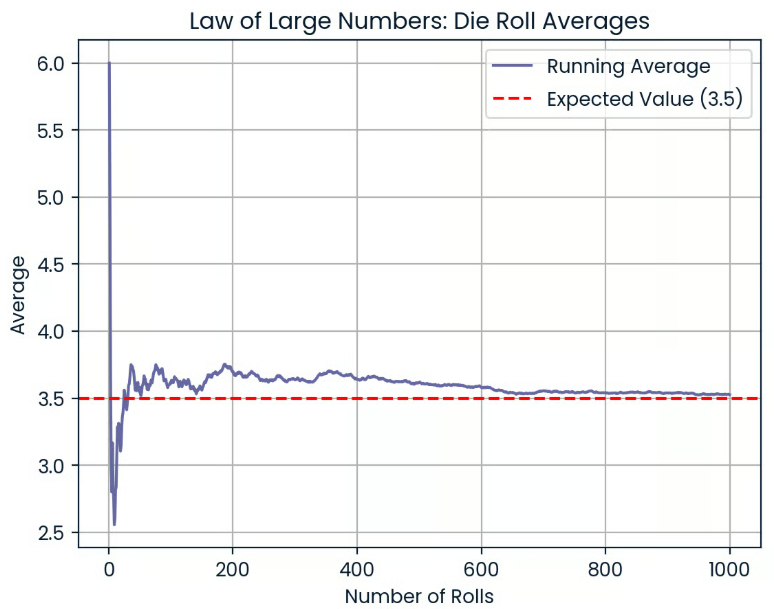
- ejem. Juegos de casino y ventaja de la casa:  Los casinos crean una ligera ventaja en todos los juegos. Si la ventaja de la casa es del 0,5%, entonces, con el tiempo, el casino espera ganar 50 céntimos por cada 100 $ apostados de media. Puede que eso no ocurra en una sesión corta, pero a lo largo de millones de jugadas, se acumula exactamente como se esperaba.
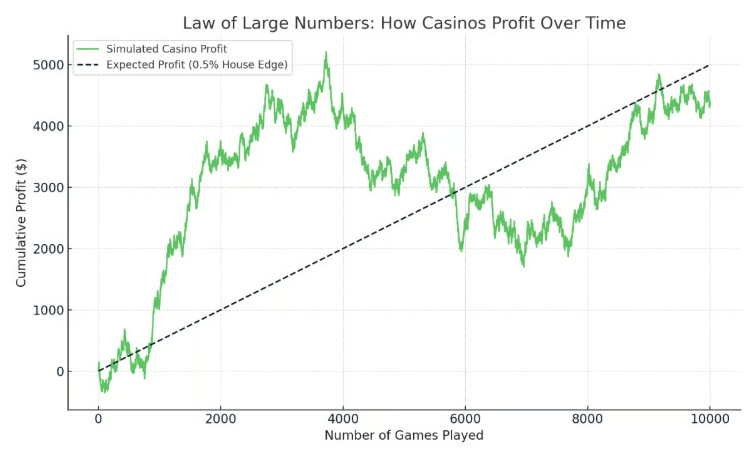

- En la ciencia de datos, a menudo utilizamos datos para entrenar modelos.
La media de la muestra va a tender a la media de la población. 
Se va a utilizar las colas como los errores
- Lo que esperamos en el modelo de regresión. Va a identíficar bien la media pero unas colas de error más grandes significa que el modelo se va a ajustar peor.

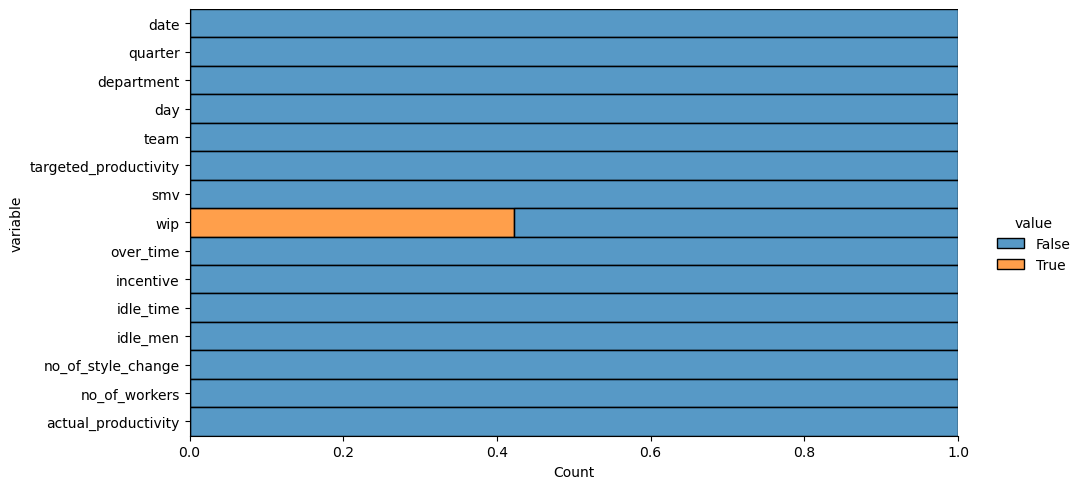

In [4]:
#datos nulos
data.isnull().melt().pipe(lambda df: sb.displot(data=df, y='variable', hue='value',multiple='fill',aspect=2))
plt.show()    
#estádisticamente esa variable con muchos nulos se deberías eliminar, pero nos dice mucho en el problema

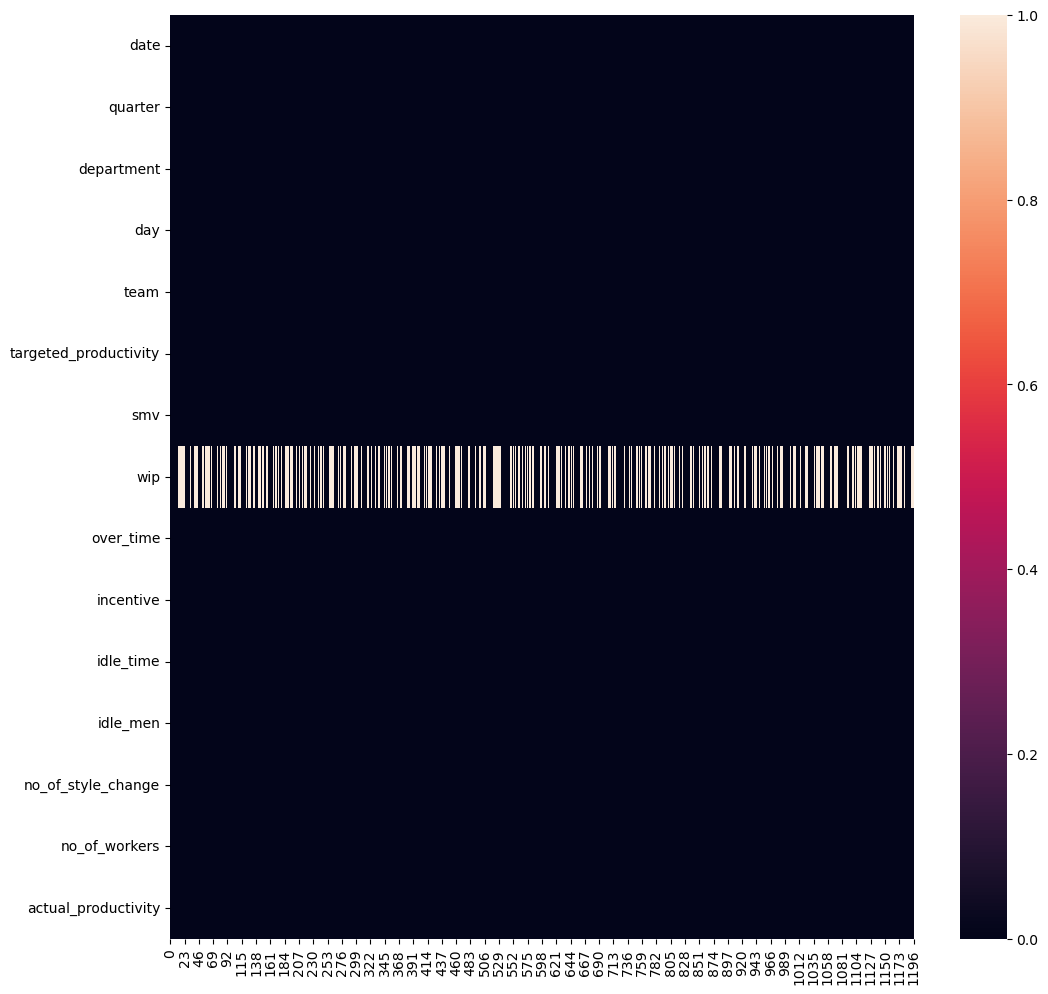

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()
#Distribución variada de los datos nulos

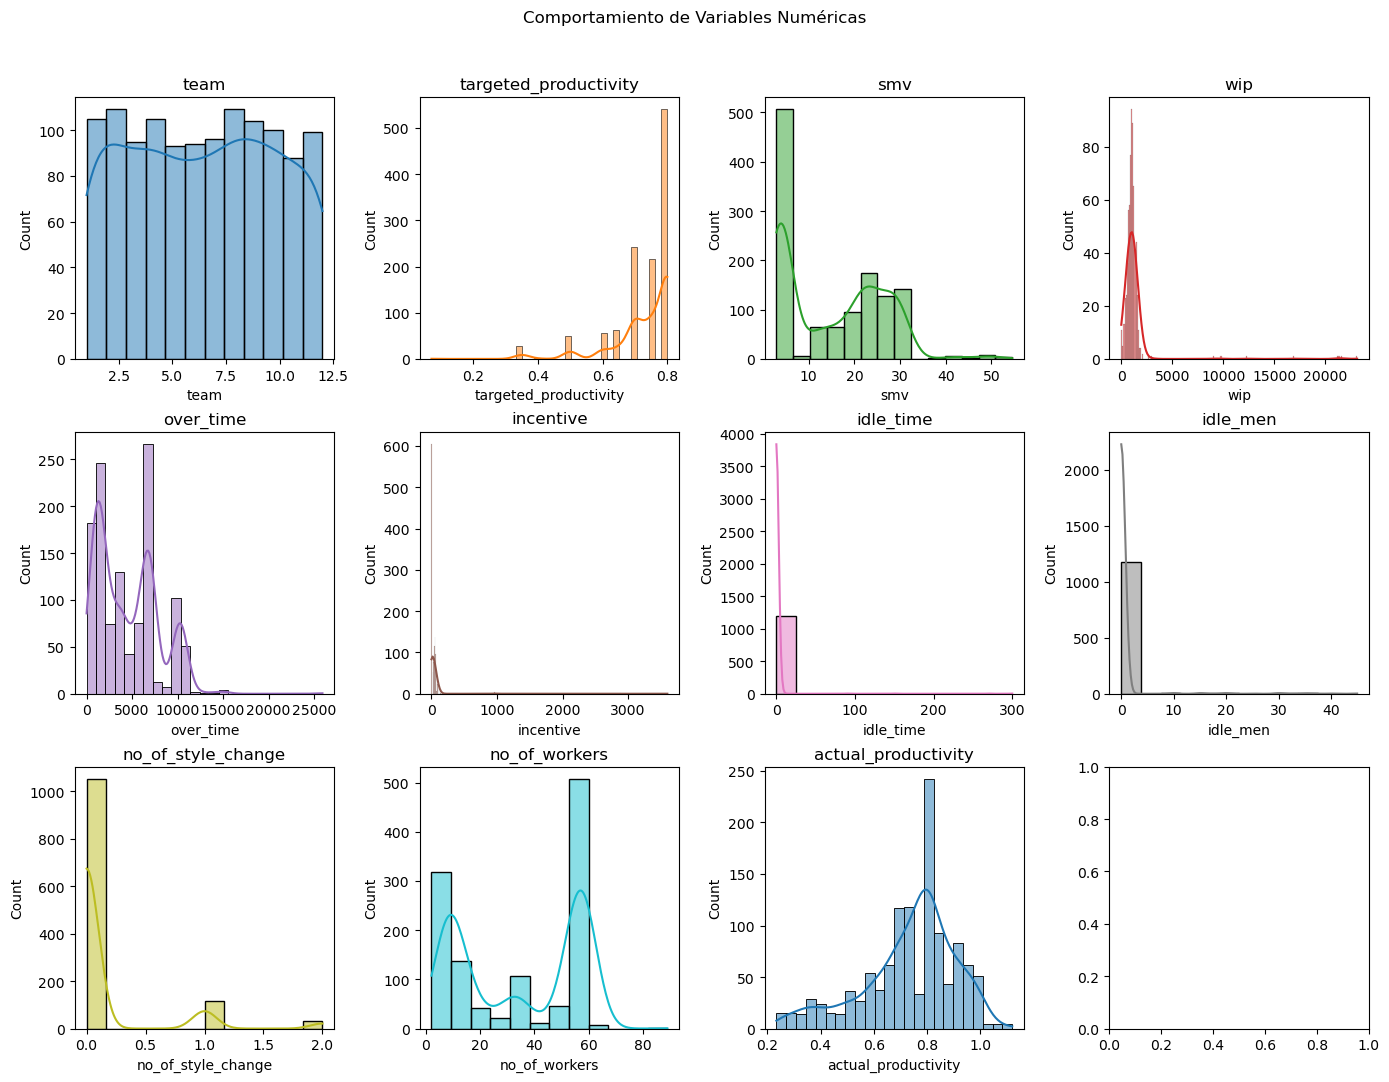

In [6]:
#histograma de frecuencias variables númericas 
fig, ax = plt.subplots(3,4, figsize=(14,11))
ax = ax.flat
num_col=data.select_dtypes(include=['int64','float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

- La variable team aparece en forma de variable tipo id, casi uniforme en todos los escenarios 
- productividad es una funcion de probabilidad exponencial, ya que la espectativa no es que todos tengan la misma productividad pero que si tiendan 
- varias actividades tienen una duración muy corta 
- el working process, se tienen eventos de alta magnitud
- overtime tiene una funcion no parametrica 
- idle t y men tienen sesgos completos a la izquierda, t de paro en 0 es alto (mayor parte de las veces en 0 no ha estado parada) vamos a mantener estas variables anque su patron de frecuencia sea no muy util. La maquina va a aprender que no hay pars y no hay gente quieta 
- no style se puede ignorar, incluso como categorica se puede ignorar ya que esta exponencial 
- productividad actual tiene un pequeño sesgo a la izquierda 
-Variabels a ser ignoraradas no style of change, idle time y men (var tiene un solo valor), team,  
-no of style change tambien la qiitamos 


### Además el profesor estaba hablando de que actualmente no existe pero se está trabajando en modelos de ml que sepan trabajar con datos nulos, esto para que no se tenga que hacer tratamiento de datos --> me parece inportante ya que en tecnicas de sec se trabaja con muchos datos herrados o nulos en algunos casos --> ver como poner esto en tesis (buscar más)



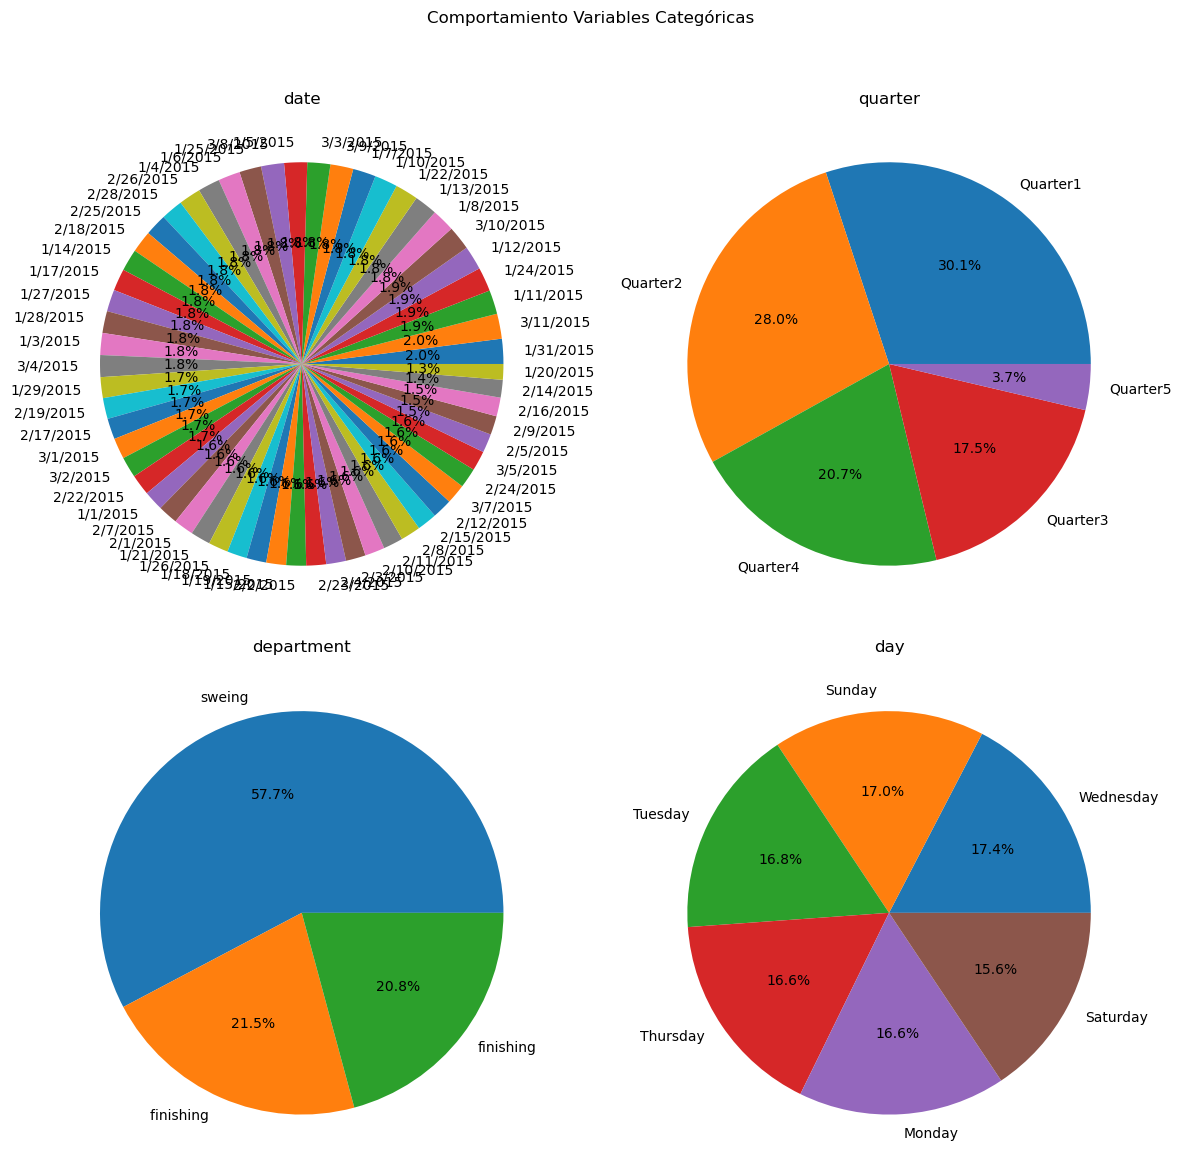

In [7]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()
#El date está bien raro, no nos aporta info tan importante
#extraer de esas variables día mes y año
#en el periodo tenemos 5 qu eestán balanceados 
#solo hay 2 departamentos, pero cuando se ingreso la info hay un error de calidad

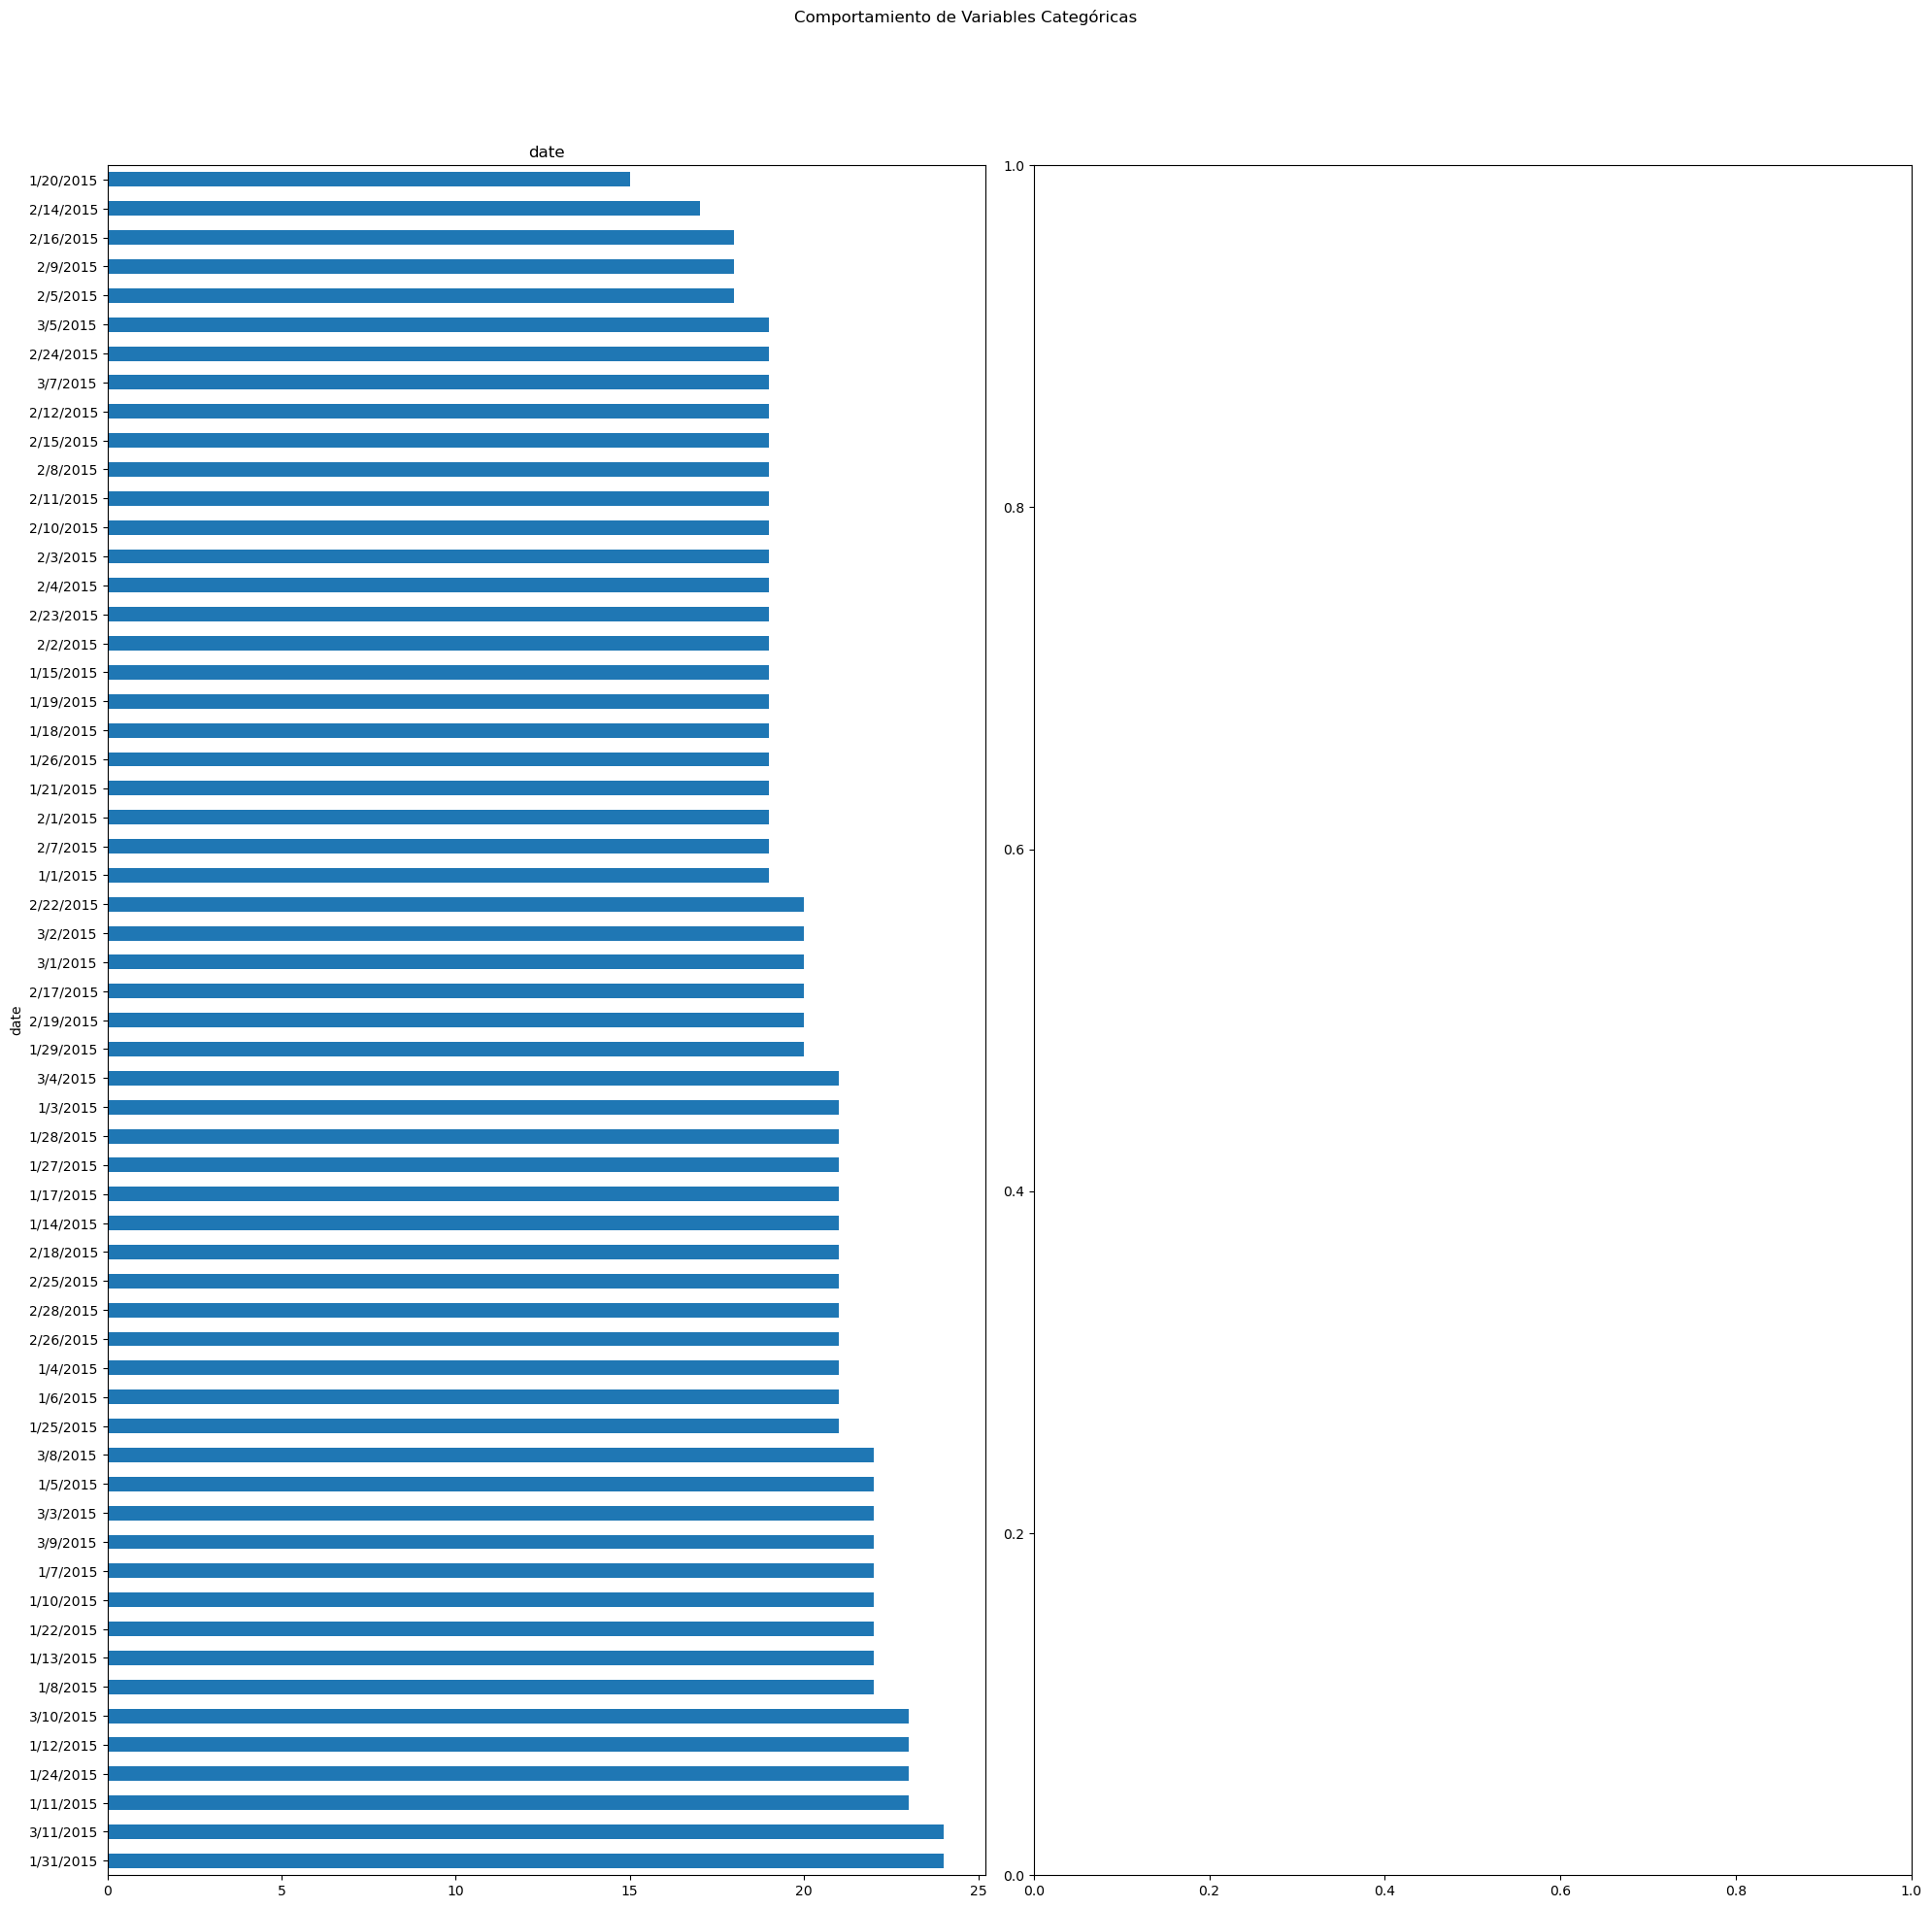

In [8]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['date']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

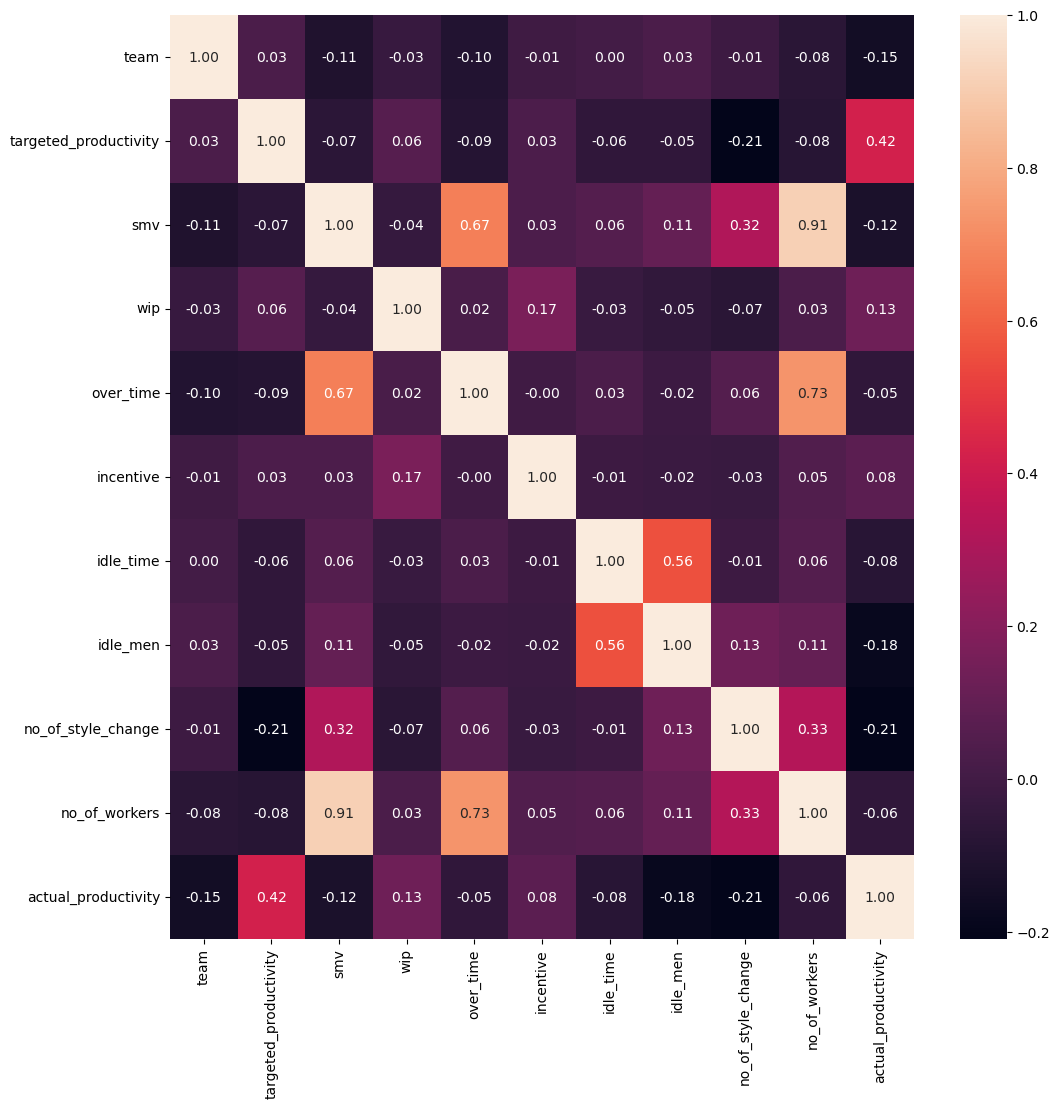

In [9]:
#factor de correlación para el análisis multivariado 
plt.figure(figsize=(12,12))
sb.heatmap(data=data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()
#vemos correlaciones fuertes en smv y num de trabajadores. Vamos a descartar num de trabajadores porque tiene mas escenarios de correlacion con otros lugares 


# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos - imputación  
- Balancear y (es más fácil balancear y después separar)
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba

In [35]:
import sklearn
import sklearn.preprocessing
categorical_cols = data.select_dtypes(include = 'object').columns 
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['date', 'quarter', 'department', 'day'], dtype='object'))])

In [11]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data),
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
data_transformed

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0.0,2.0,3.0,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0.0,0.0,1.0,3.0,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0.0,0.0,2.0,3.0,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0.0,0.0,2.0,3.0,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0.0,0.0,2.0,3.0,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51.0,1.0,0.0,5.0,10.0,0.75,2.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,51.0,1.0,0.0,5.0,8.0,0.70,3.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,51.0,1.0,0.0,5.0,7.0,0.65,3.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,51.0,1.0,0.0,5.0,9.0,0.75,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


In [12]:
#Imputación recursiva
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
recursive_imputer = sklearn.impute.IterativeImputer(estimator = DecisionTreeRegressor(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed),
                                 columns = data_transformed.columns,
                                 index = data_transformed.index)
data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   float64
 1   quarter                1197 non-null   float64
 2   department             1197 non-null   float64
 3   day                    1197 non-null   float64
 4   team                   1197 non-null   float64
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   float64
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [13]:
data_recursive_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,1197.0,28.879699,17.183124,0.000000,14.000000,28.000000,44.000000,58.000000
quarter,1197.0,1.399332,1.215535,0.000000,0.000000,1.000000,2.000000,4.000000
department,1197.0,1.369256,0.805909,0.000000,1.000000,2.000000,2.000000,2.000000
day,1197.0,2.534670,1.714538,0.000000,1.000000,3.000000,4.000000,5.000000
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1186.180451,2195.744734,7.000000,711.000000,957.000000,1255.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000


In [14]:
data_imputed = data_recursive_df.copy()
data_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive_df[categorical_cols]))
data_imputed

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10.0,0.75,2.90,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8.0,0.70,3.90,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7.0,0.65,3.90,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9.0,0.75,2.90,813.0,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


In [15]:
data_mod = data_imputed.drop(['team', 'no_of_style_change', 'no_of_workers', 'incentive', 'idle_men', 'idle_time'], axis = 1)
data_mod['department'].replace({'finishing ': 'finishing'}, inplace = True)
data_mod['date'] = pd.to_datetime(data_mod['date'], format = '%m/%d/%Y')
data['num_day'] = [i.day for i in data_mod.date] 
data['month'] = [i.month for i in data_mod.date]
data_mod.drop('date', axis = 1, inplace = True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    1197 non-null   float64
 6   over_time              1197 non-null   float64
 7   actual_productivity    1197 non-null   float64
dtypes: float64(5), object(3)
memory usage: 74.9+ KB


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = data_mod.select_dtypes(include= ['int64', 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include = ['object']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers= [('num', num_transformer, num_col),
                                                ('cat', cat_transformer, cat_col)],
                                                remainder= 'passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['targeted_productivity', 'smv', 'wip',
                                  'over_time', 'actual_productivity']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['quarter', 'department', 'day'])])

In [17]:
data_pre = preprocessor.fit_transform(data_mod)
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col) #variables categóricas, indica cual es 1 y cual es 0
labels = np.concatenate([num_col, cod_cat])
data_pro = pd.DataFrame(data_pre, columns = labels )
data_pro

,targeted_productivity,smv,wip,over_time,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1.000000,0.450252,0.047631,0.273148,0.797332,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.931507,0.020132,0.034869,0.037037,0.736180,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.164731,0.041575,0.141204,0.639274,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.164731,0.041575,0.141204,0.639274,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.445219,0.050314,0.074074,0.639062,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.931507,0.000000,0.034869,0.037037,0.445036,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1193,0.863014,0.019357,0.034869,0.037037,0.441982,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1194,0.794521,0.019357,0.034869,0.037037,0.441982,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1195,0.931507,0.000000,0.034869,0.069444,0.306951,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
X = data_pro.drop('actual_productivity', axis = 1)
y = data_pro[['actual_productivity']]

El tamaño del conjunto de entrenamiento es (837, 17) (837, 1)
El tamaño del conjunto de validación es (360, 17)(360, 1)


<Axes: xlabel='actual_productivity', ylabel='Count'>

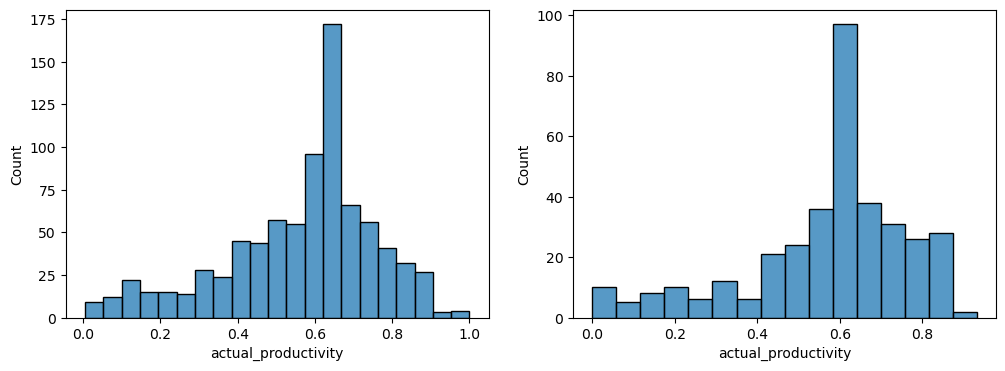

In [19]:
#implementacion del trasformador de variables para el modelado 
#no se definió x y y
#no se balanceó
#solos s procesó todo el df
#cuando se tiene valores de y muy grandes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)
print(f'El tamaño del conjunto de entrenamiento es {X_train.shape} {y_train.shape}\nEl tamaño del conjunto de validación es {X_test.shape}{y_test.shape}')
fig, ax = plt.subplots(1, 2, figsize = (12,4))
sb.histplot(data = y_train, x = 'actual_productivity', ax = ax[0])
sb.histplot(data = y_test, x = 'actual_productivity', ax = ax[1])

![Imagen de WhatsApp 2025-09-03 a las 09.48.21_ab8d6700.jpg](<attachment:Imagen de WhatsApp 2025-09-03 a las 09.48.21_ab8d6700.jpg>)
Ya no hablamos de regresión logistica sino que hablamos de regresion lineal 
En la regresión lineal la situación problema es encontrar el valor de Bi que minimice el error de ajuste 
En el minimice está el aprendizaje y el ajuste puede ser un error cuadático o un error absoluto ( ese proceso devuelev los Bi que sean capaces de minimizar la expresión)
Hiperplanos que queremos ver a traves de una línea recta una generalización de los datos, donde nos quede una ecuacion 
B0 es el intercepto con el eje y x1 es la cantidad de info que aporta x1 a y 
Si se tiene más x es similar a la regresión logistica .
Hay una forma de encontrar y ajustar ese B que es con el método de minimos cuadrados 
Unico método de aprendizaje de máquina con explesión analítica, se pueden encontrar manualmente esos valores, los demas métodos tienen aplicaciones recursivas, se puede derivar para encontrar los metodos con minima posible 
También se pueden vincular los algoritmos genéticos qu epuedan hacerlo de manera más rápida. Unica técnica de machine learning que no cuenta con estaods aleatorias (el random state es el escenario aleat que plantea esto al minimo recursicvo)
Tiene sln analitica no tiene hiperparametros ya que su sln es analitica 
 
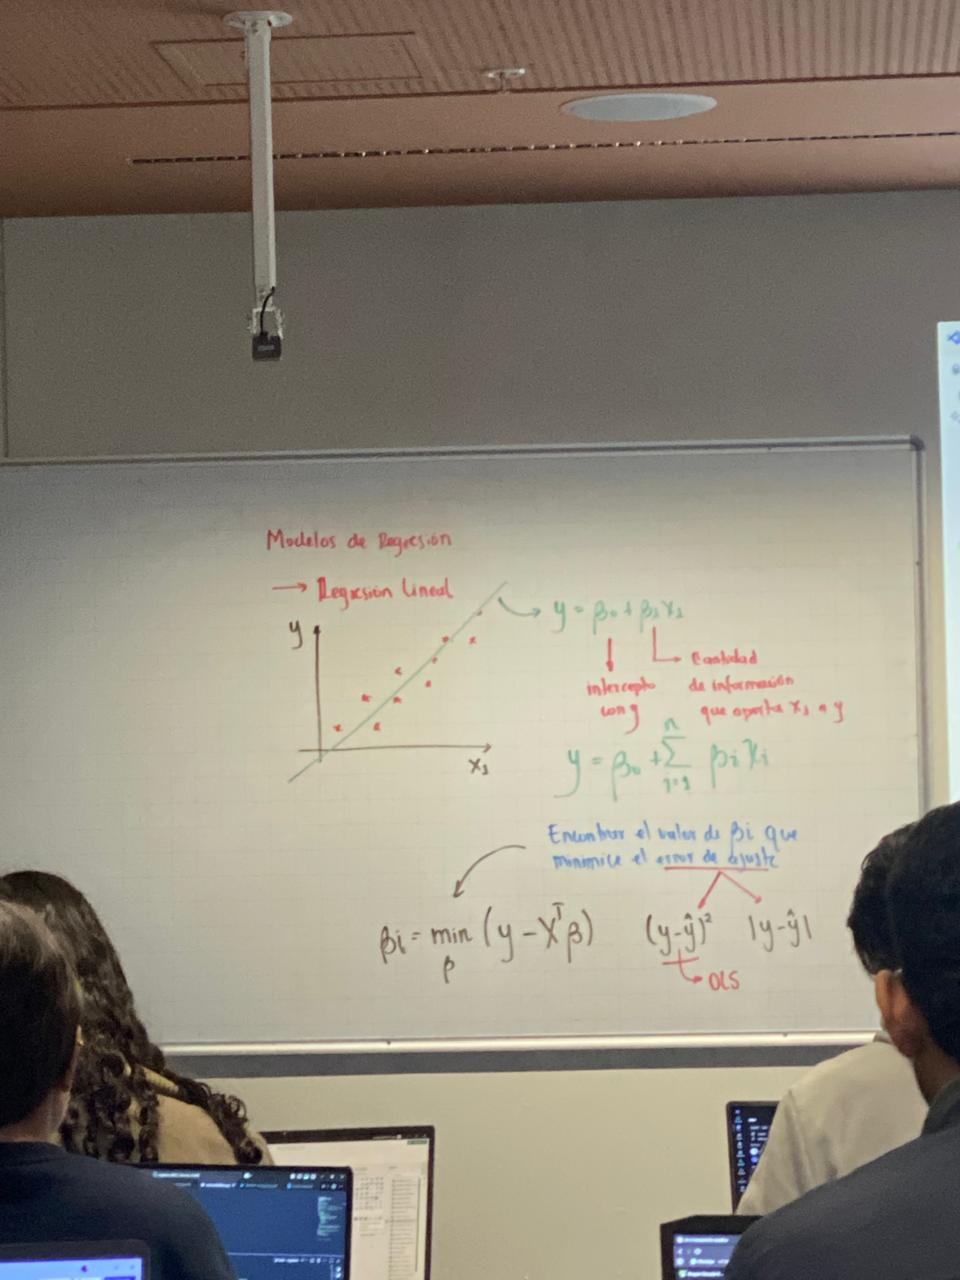

## **7.Modelado**
- regresión lineal 
- k vecinos más cercanos 
- máquinas de soporte vectorial 
- arboles de desición
- metodos de ensamble  
    - Random forest 
    - gradient boost 
    - adaptative boost 
- Percepcion multicapa (redes neuronales tienen capas ocultas) 

In [20]:
# importar todos lo anterior
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [21]:
# regresión lineal 
modelo_1= LinearRegression()
modelo_1.fit(X_train, y_train)


LinearRegression()

In [22]:
modelo_1.coef_
#Se pueden obtener coeficientes a traves de la linea recta, muchas veces la regresion linal asume comportamiento lineal cunso mucho de nuestros procesos no son lienales 
#se va a llegar hasta el despliegue en regresión o no sé 

array([[ 0.56923921, -0.1672253 ,  0.21028143,  0.16275794, -0.01282043,
        -0.00319285, -0.05018386, -0.0352915 ,  0.10148865, -0.00915491,
         0.00915491, -0.00722975,  0.00142434, -0.02203131, -0.01386349,
         0.02957187,  0.01212835]])

In [23]:

modelo_1.intercept_

array([0.06770048])

### K vecinos más cercanos 

In [24]:
from sklearn.model_selection import GridSearchCV
modelo_2 = KNeighborsRegressor()

param_grid = {
  'n_neighbors': [2, 5, 9, 15, 25, 40, 35],
  'p': [1, 2],
}

reg_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_2.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_2.cv_results_['params']),
    pd.DataFrame(reg_2.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

# Al usar MAPE, el mejor es el valor más cercano a 0, pero como sklearn usa el negativo, el mejor es el más cercano a 0 por la izquierda (el menos negativo)

  File "c:\Anacondanew3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Anacondanew3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Anacondanew3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Anacondanew3\Lib\subprocess.py", line 1554, in _execute_child
  

,n_neighbors,p,MAPE
13,35,2,-0.795687
1,2,2,-0.796882
9,25,2,-0.801041
8,25,1,-0.802669
11,40,2,-0.803332
12,35,1,-0.803813
10,40,1,-0.805915
0,2,1,-0.808207
6,15,1,-0.830541
7,15,2,-0.831270


In [25]:

modelo_2_final = reg_2.best_estimator_
modelo_2_final

KNeighborsRegressor(n_neighbors=35)

### Maquinas de soporte vectorial 


In [26]:
modelo_3 = SVR()

param_grid = {
  'C': [0, 0.01, 1, 10, 100],
  'kernel': ['linear', 'poly', 'rbf'],
  'degree': [2, 3]
}

reg_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_3.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_3.cv_results_['params']),
    pd.DataFrame(reg_3.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

# Al usar MAPE, el mejor es el valor más cercano a 0, pero como sklearn usa el negativo, el mejor es el más cercano a 0 por la izquierda (el menos negativo)

,C,degree,kernel,MAPE
22,10.00,3,poly,-0.748702
24,100.00,2,linear,-0.760930
27,100.00,3,linear,-0.760930
21,10.00,3,linear,-0.761561
18,10.00,2,linear,-0.761561
12,1.00,2,linear,-0.762153
15,1.00,3,linear,-0.762153
26,100.00,2,rbf,-0.771103
29,100.00,3,rbf,-0.771103
20,10.00,2,rbf,-0.773632


In [27]:

modelo_3_final = reg_3.best_estimator_
modelo_3_final

SVR(C=10, kernel='poly')

### Árbol de regresión 

In [28]:
modelo_4 = DecisionTreeRegressor(random_state=123)

param_grid = {
  'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
  'max_depth': [None, 5, 6, 3, 4, 10, 100],
  'min_samples_split': [2, 3],
  'max_leaf_nodes': [None, 2, 3, 4]
}

reg_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_4.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_4.cv_results_['params']),
    pd.DataFrame(reg_4.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

# Al usar MAPE, el mejor es el valor más cercano a 0, pero como sklearn usa el negativo, el mejor es el más cercano a 0 por la izquierda (el menos negativo)

,criterion,max_depth,max_leaf_nodes,min_samples_split,MAPE
57,poisson,NaN,NaN,3,-0.577465
105,poisson,100.0,NaN,3,-0.577465
97,poisson,10.0,NaN,3,-0.614948
1,friedman_mse,NaN,NaN,3,-0.618345
49,friedman_mse,100.0,NaN,3,-0.618345
...,...,...,...,...,...
194,absolute_error,3.0,2.0,2,-0.816077
210,absolute_error,10.0,2.0,2,-0.816077
211,absolute_error,10.0,2.0,3,-0.816077
219,absolute_error,100.0,2.0,3,-0.816077


In [29]:

modelo_4_final = reg_4.best_estimator_
modelo_4_final

DecisionTreeRegressor(criterion='poisson', min_samples_split=3,
                      random_state=123)

## **8. Validación**
- Ajuste cuadrfatico
- Raiz del error cuadratico medio
- Error medio absoluto
- Porcentaje del error medio absoluto


### Funciones de validación 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def predecir_y_desescalar(modelo, X_train, X_test, y_train, y_test, y_total):
    pred_train = modelo.predict(X_train)
    pred_test = modelo.predict(X_test)
    y_min, y_max = np.min(y_total), np.max(y_total)
    pred_train_des = pred_train * (y_max - y_min) + y_min
    pred_test_des = pred_test * (y_max - y_min) + y_min
    y_train_des = y_train * (y_max - y_min) + y_min
    y_test_des = y_test * (y_max - y_min) + y_min
    return pred_train_des, pred_test_des, y_train_des, y_test_des

def mostrar_metricas(y_train_des, pred_train_des, y_test_des, pred_test_des, nombre_modelo="Modelo"):
    # Entrenamiento
    r2_train = r2_score(y_train_des, pred_train_des)
    rmse_train = root_mean_squared_error(y_train_des, pred_train_des)
    mae_train = mean_absolute_error(y_train_des, pred_train_des)
    mape_train = mean_absolute_percentage_error(y_train_des, pred_train_des) * 100

    print(f"Las métricas de desempeño en entrenamiento para {nombre_modelo} son:")
    print(f"R2: {r2_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")
    print(f"MAPE: {mape_train / 100}")

    sb.histplot(data=y_train_des, label='Datos de entrenamiento')
    sb.histplot(pred_train_des, label='Predicciones de entrenamiento')
    plt.legend()
    plt.show()

    # Test
    r2_test = r2_score(y_test_des, pred_test_des)
    rmse_test = root_mean_squared_error(y_test_des, pred_test_des)
    mae_test = mean_absolute_error(y_test_des, pred_test_des)
    mape_test = mean_absolute_percentage_error(y_test_des, pred_test_des) * 100

    print(f"Las métricas de desempeño en test para {nombre_modelo} son:")
    print(f"R2: {r2_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"MAPE: {mape_test / 100}")

    sb.histplot(data=y_test_des, label='Datos de test')
    sb.histplot(pred_test_des, label='Predicciones de test')
    plt.legend()
    plt.show()

### Regresión líneal 


Las métricas de desempeño en entrenamiento para Regresión Lineal son:
R2: 0.22537018446028823
RMSE: 0.17213401828301952
MAE: 0.12177139347257551
MAPE: 0.7458003121269274


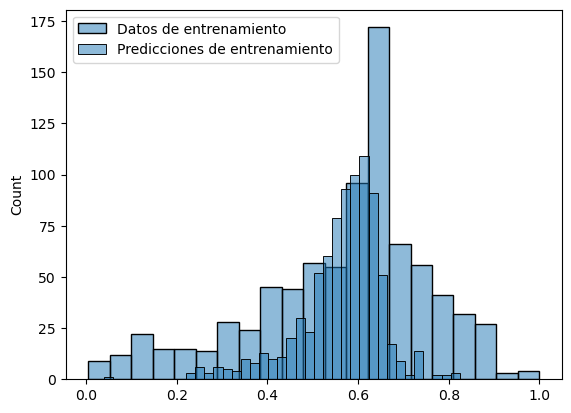

Las métricas de desempeño en test para Regresión Lineal son:
R2: 0.19618036848091347
RMSE: 0.17845717168708727
MAE: 0.12961960908966572
MAPE: 6181349091657.568


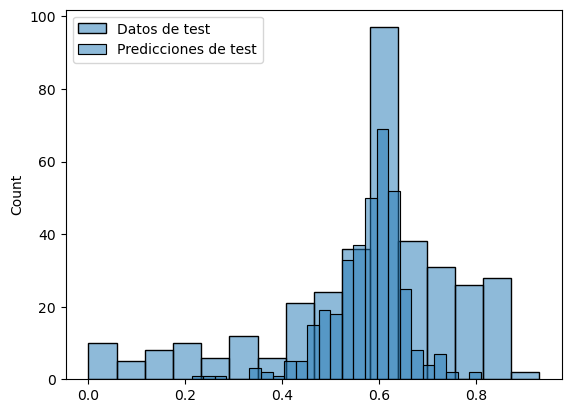

In [31]:
pred_train_1, pred_test_1, y_train_des, y_test_des = predecir_y_desescalar(modelo_1, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_1, y_test_des, pred_test_1, nombre_modelo="Regresión Lineal")

### K vecionos más cercanos 

Las métricas de desempeño en entrenamiento para KNN son:
R2: 0.21018573994512968
RMSE: 0.17381293288567876
MAE: 0.12934491009455107
MAPE: 0.7837995944466288


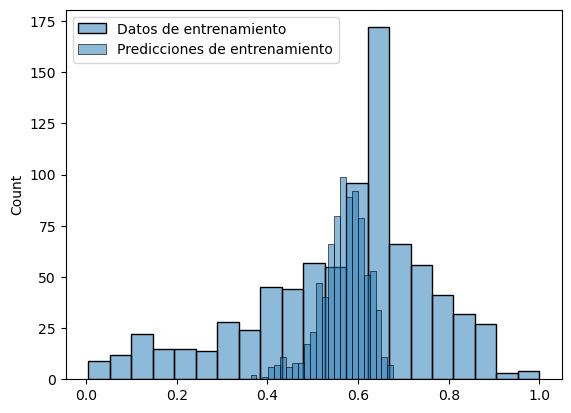

Las métricas de desempeño en test para KNN son:
R2: 0.11801400180244437
RMSE: 0.18693281528771546
MAE: 0.1394574386132836
MAPE: 6375018626322.678


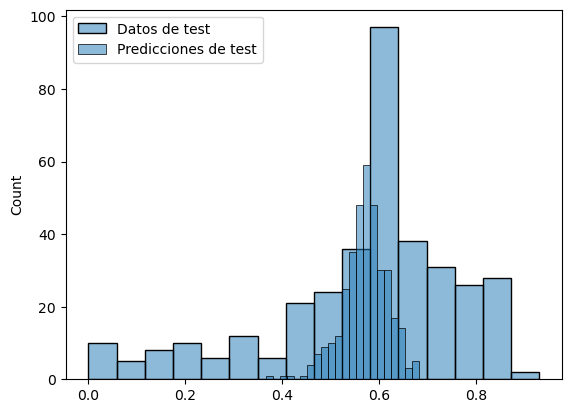

In [32]:
pred_train_2, pred_test_2, y_train_des, y_test_des = predecir_y_desescalar(modelo_2_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_2, y_test_des, pred_test_2, nombre_modelo="KNN")

### Máquinas de soporte vectorial 

Las métricas de desempeño en entrenamiento para MSV son:
R2: 0.4799075602946691
RMSE: 0.1410457072529245
MAE: 0.10139745910946793
MAPE: 0.6592765399091661


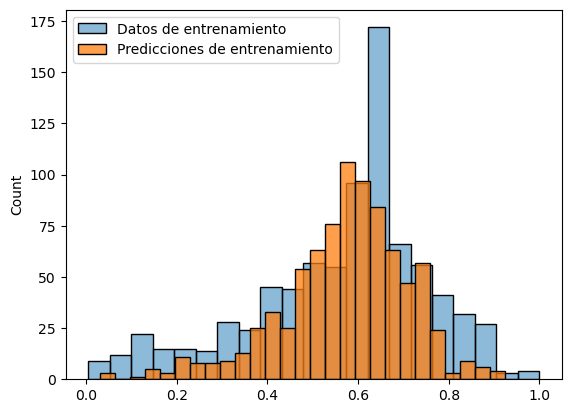

Las métricas de desempeño en test para MSV son:
R2: 0.19346388032759976
RMSE: 0.17875846310349935
MAE: 0.13141517220104876
MAPE: 1538063935036.5737


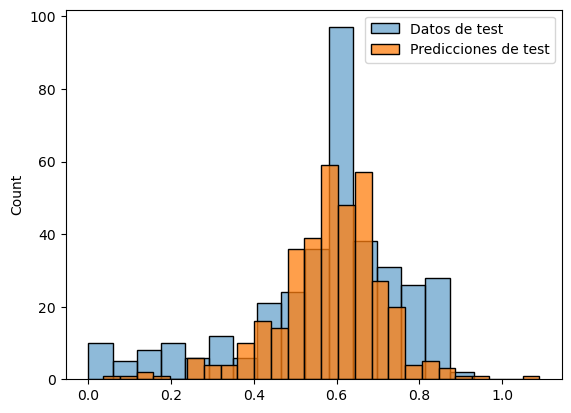

In [33]:
pred_train_3, pred_test_3, y_train_des, y_test_des = predecir_y_desescalar(modelo_3_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_3, y_test_des, pred_test_3, nombre_modelo="MSV")

### Arbol de Regresión

Las métricas de desempeño en entrenamiento para Arbol Regresion son:
R2: 0.968619294765671
RMSE: 0.03464582857946122
MAE: 0.013908037954834867
MAPE: 0.045272051063059315


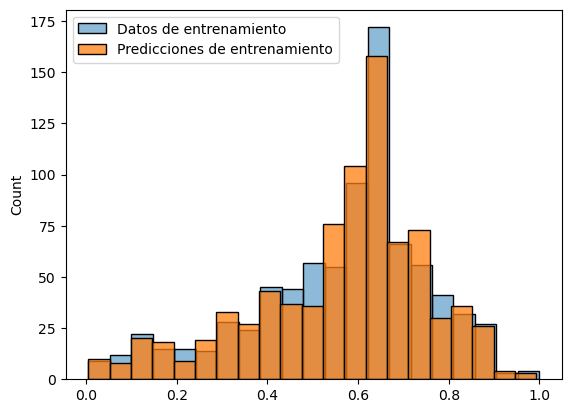

Las métricas de desempeño en test para Arbol Regresion son:
R2: 0.0002200893682596794
RMSE: 0.19902466624989465
MAE: 0.12900825000781707
MAPE: 5621174896841.187


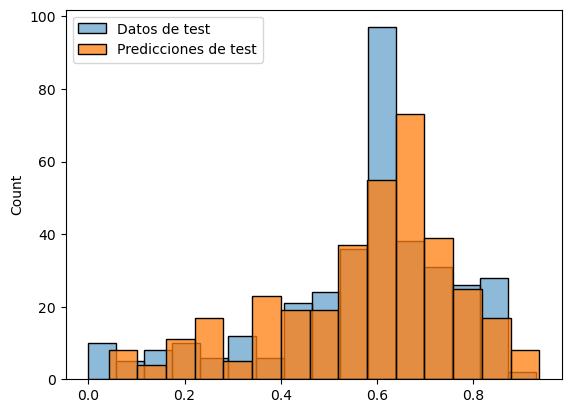

In [34]:
pred_train_4, pred_test_4, y_train_des, y_test_des = predecir_y_desescalar(modelo_4_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_4, y_test_des, pred_test_4, nombre_modelo="Arbol Regresion")